In [86]:
import os
import json
import pandas
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.externals import joblib
% matplotlib inline

In [87]:
Ned = []
Med = []
NRd = []
MRd = []
fck = []
As = []
bh = []
a = []
xu = []
l0 = []
listdir = os.listdir("../../data_set/buckling")


for file in listdir:
    f = open("../../data_set/buckling/" + file)
    d = json.loads(f.read())
    f.close()

    for o in d:
        Ned.append(o["Ned"])
        #Med.append(o["Med"])
        #NRd.append(o["NRd"])
        MRd.append(o["MRd"])
        fck.append(o["fck"])
        As.append(o["As"])
        bh.append(o["bh"])
        #a.append(o["a"])
        #xu.append(o["xu"])
        l0.append(o["l0"])

rho = []
for i in range(len(As)):
    rho.append(As[i] / bh[i]**2)


In [116]:
df = pandas.DataFrame({
        "l0": l0,
        "Ned": Ned,
        "MRd": MRd,
        "fck": fck,
        "bh": bh,
    }
    )
print(df.shape)
df = df[df["fck"] == 30]
print(df.shape)
df.head(5)

print(np.mean(rho))

(195333, 5)
(66540, 5)
0.00426035003074


In [97]:
# Scale all features by their mean and std-dev to value 0 - 1. This is the correct one.

feat_df = df[["MRd", "Ned", "l0"]]
res_df = df[["bh"]]

scale_feat = preprocessing.MinMaxScaler()
scale_feat.fit(feat_df)
print(scale_feat.transform(feat_df))


[[ 0.          0.          0.10326064]
 [ 0.0043363   0.          0.12979905]
 [ 0.01404371  0.          0.16087018]
 ..., 
 [ 0.67487247  0.10801394  0.49877541]
 [ 0.76713718  0.10801394  0.53929913]
 [ 0.86413787  0.10801394  0.58106777]]


In [98]:
df = df.sample(frac=1)
split = int(40e3)

df_train = df[:split]
df_test = df[split:]
df_train.head(5)

print(df_train.shape, df_test.shape)

(40000, 5) (26540, 5)


In [102]:
train_feat = scale_feat.transform(df_train[["MRd", "Ned", "l0"]])
train_res = df_train[["bh"]].as_matrix()

test_feat = scale_feat.transform(df_test[["MRd",  "Ned", "l0"]])
test_res = df_test[["bh"]].as_matrix()

print("Training features:\n MRd,, Ned, l0\n")
print(train_feat[:5])

print("\nTraining labels:\n bh\n")
print(train_res[:5])
print(train_feat.shape)

Training features:
 MRd,, Ned, l0

[[ 0.39865636  0.28919861  0.27429884]
 [ 0.63974198  0.83972125  0.12450218]
 [ 0.3469904   0.14982578  0.21048118]
 [ 0.244154    0.33797909  0.04063123]
 [ 0.58575171  0.81184669  0.11459278]]

Training labels:
 bh

[[675]
 [625]
 [500]
 [300]
 [600]]
(40000, 3)


In [103]:
X = train_feat
y = train_res
y = np.reshape(y, y.shape[0])

In [108]:
# try:
#     m = joblib.load("buckling_fck30")
# except FileNotFoundError:

m = MLPRegressor(max_iter=2000, learning_rate="adaptive", verbose=True, early_stopping=False, hidden_layer_sizes=(8, 2))
m.fit(X, y)

Iteration 1, loss = 151191.30604404
Iteration 2, loss = 151068.66763848
Iteration 3, loss = 150962.81232274
Iteration 4, loss = 150857.00375493
Iteration 5, loss = 150751.24484860
Iteration 6, loss = 150645.56016456
Iteration 7, loss = 150539.93062498
Iteration 8, loss = 150434.35185422
Iteration 9, loss = 150328.81622162
Iteration 10, loss = 150223.32883760
Iteration 11, loss = 150117.90850092
Iteration 12, loss = 150012.52753086
Iteration 13, loss = 149907.19177157
Iteration 14, loss = 149801.91006678
Iteration 15, loss = 149696.65900832
Iteration 16, loss = 149591.43618818
Iteration 17, loss = 149486.26376042
Iteration 18, loss = 149381.14557714
Iteration 19, loss = 149276.07092224
Iteration 20, loss = 149171.05367049
Iteration 21, loss = 149066.07276177
Iteration 22, loss = 148961.12570626
Iteration 23, loss = 148856.21250709
Iteration 24, loss = 148751.33636690
Iteration 25, loss = 148646.51543343
Iteration 26, loss = 148541.73867185
Iteration 27, loss = 148437.00281894
Iteration 

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(8, 2), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer

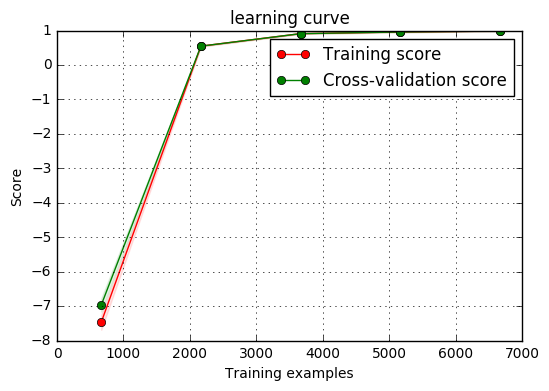

In [50]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(MLPRegressor(), "learning curve", X[:int(1e4)], y[:int(1e4)])
plt.show()

In [109]:
# Test

pred = m.predict(test_feat)

for i in range(15):
    print("Prediction :", int(pred[i]), "Computed: ", test_res[i][0], "Deviation: %s%%" % (round(1 - (pred[i] / test_res[i])[0], 2) * 100)) 

Prediction : 409 Computed:  425 Deviation: 4.0%
Prediction : 426 Computed:  375 Deviation: -14.0%
Prediction : 738 Computed:  750 Deviation: 2.0%
Prediction : 385 Computed:  400 Deviation: 4.0%
Prediction : 676 Computed:  700 Deviation: 3.0%
Prediction : 292 Computed:  300 Deviation: 2.0%
Prediction : 531 Computed:  550 Deviation: 3.0%
Prediction : 732 Computed:  725 Deviation: -1.0%
Prediction : 546 Computed:  575 Deviation: 5.0%
Prediction : 398 Computed:  425 Deviation: 6.0%
Prediction : 470 Computed:  500 Deviation: 6.0%
Prediction : 380 Computed:  375 Deviation: -2.0%
Prediction : 580 Computed:  600 Deviation: 3.0%
Prediction : 799 Computed:  775 Deviation: -3.0%
Prediction : 346 Computed:  300 Deviation: -15.0%


In [110]:
dev = 0
for i in range(pred.shape[0]):
    dev += abs(1 - (pred[i] / test_res[i])[0])

print("Total accuracy %s%%" % (100 - round(dev / pred.shape[0] * 100, 2)))


Total accuracy 95.25%


In [42]:
joblib.dump(m, 'buckling_fck30.pkl') 

['buckling_fck30.pkl']

In [123]:
input = {
    "MRd": [140e6],
    "rho": [0.015],
    "Ned": [1200e3],
    "l0": [2e3],
}

for i in input:
    input[i].append(0)

inp = pandas.DataFrame(input)
print(inp.head())

X = scale_feat.transform(inp[["MRd", "Ned", "l0"]])
print("\nPrediction:", m.predict(X)[:-1])

h = m.predict(X)[:-1]
ac = h**2
as_ = ac * input["rho"][0]
mrd = 0.8 * h * as_ * 435 + 0.4 * h * input["Ned"][0]
print(as_)


n = input["Ned"][0] / (ac * 20 + as_ * 435)
ylim = 10.8 / n**0.5

print("mrd", mrd / 1e6)
print("ylim", ylim)
print("y", input["l0"][0] / ( h / 3.46 ))

           MRd        Ned      l0    rho
0  140000000.0  1200000.0  2000.0  0.015
1          0.0        0.0     0.0  0.000

Prediction: [ 346.82394332]
[ 1804.30271489]
mrd [ 384.24532591]
ylim [ 17.61042757]
y [ 19.95248636]
